In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [78]:
#DATA COLLECTION & ANALYSIS
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('C:\\Users\\ishar\\Downloads\\insurance.csv')
df = pd.read_csv('C:\\Users\\ishar\\Downloads\\insurance.csv')

In [7]:
# first 5 rows of the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# number of rows and columns
insurance_dataset.shape

(1338, 7)

In [11]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
#Categorical Features:
#Sex
#Smoker
#Region

# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
#Data Analysis

# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\ishar\AppData\Local\Temp\ipykernel_11832\3634923312.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


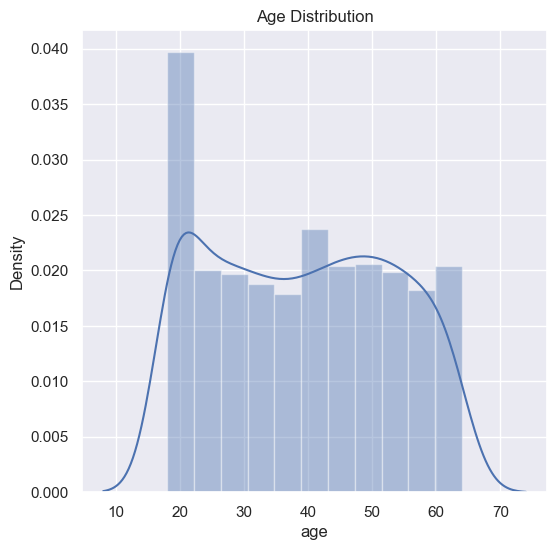

In [17]:
# distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

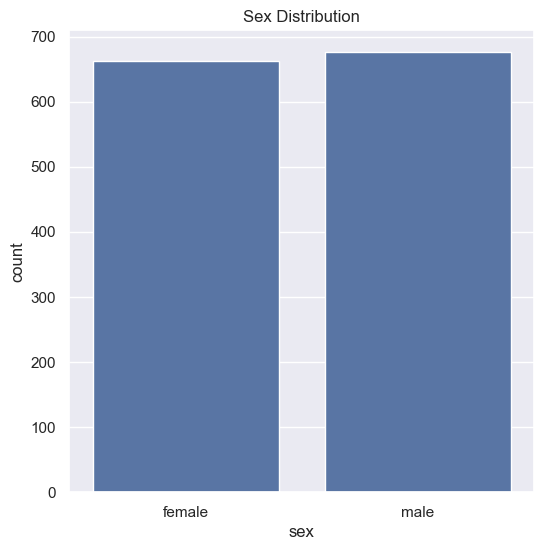

In [19]:
# Gender column
plt.figure(figsize=(6,6))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()

In [21]:
insurance_dataset['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

C:\Users\ishar\AppData\Local\Temp\ipykernel_11832\1916795400.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


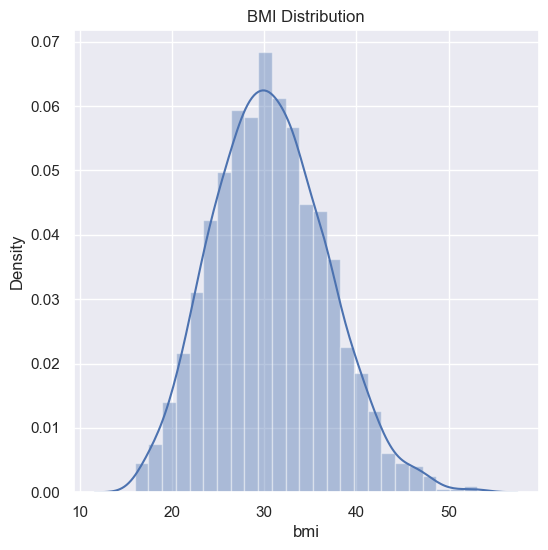

In [79]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

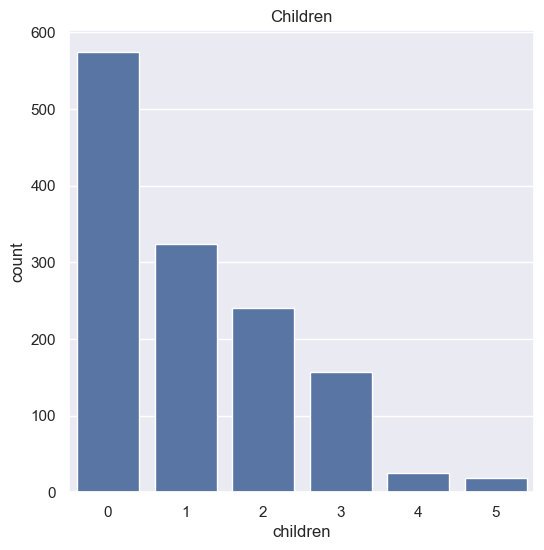

In [25]:
# children column
plt.figure(figsize=(6,6))
sns.countplot(x='children', data=insurance_dataset)
plt.title('Children')
plt.show()

In [27]:
insurance_dataset['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

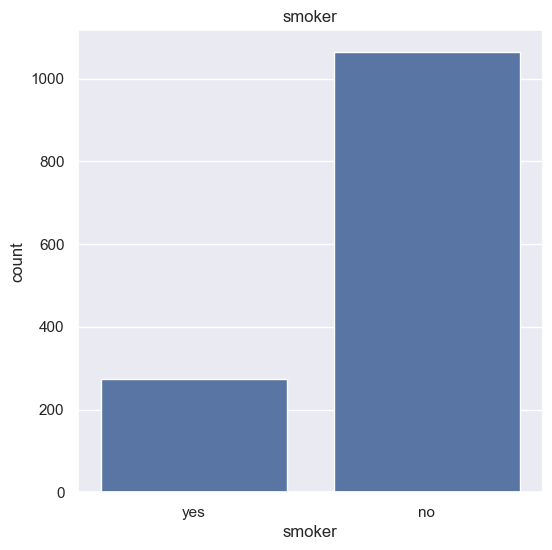

In [29]:
# smoker column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

Text(0.5, 1.0, 'charges for smokers')

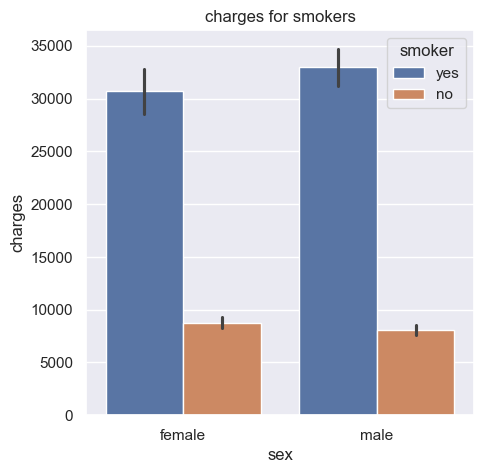

In [82]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker',data=df)
plt.title('charges for smokers')

<Axes: xlabel='region', ylabel='charges'>

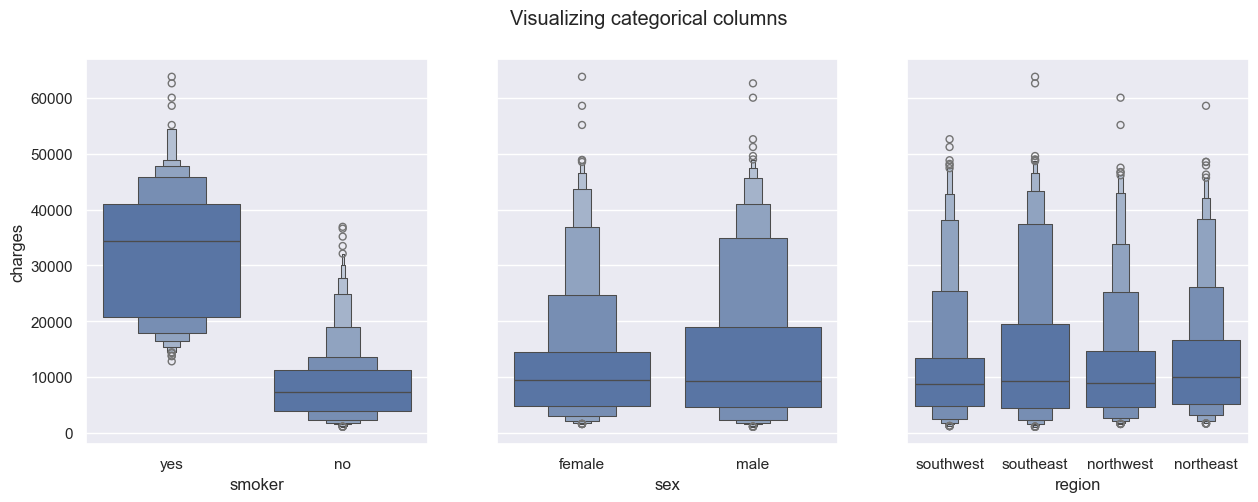

In [84]:
fig, axes = plt.subplots (1,3, figsize=(15,5), sharey=True) 
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=df, ax=axes[0])
sns.boxenplot(x='sex', y= 'charges', data=df, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=df, ax=axes [2])

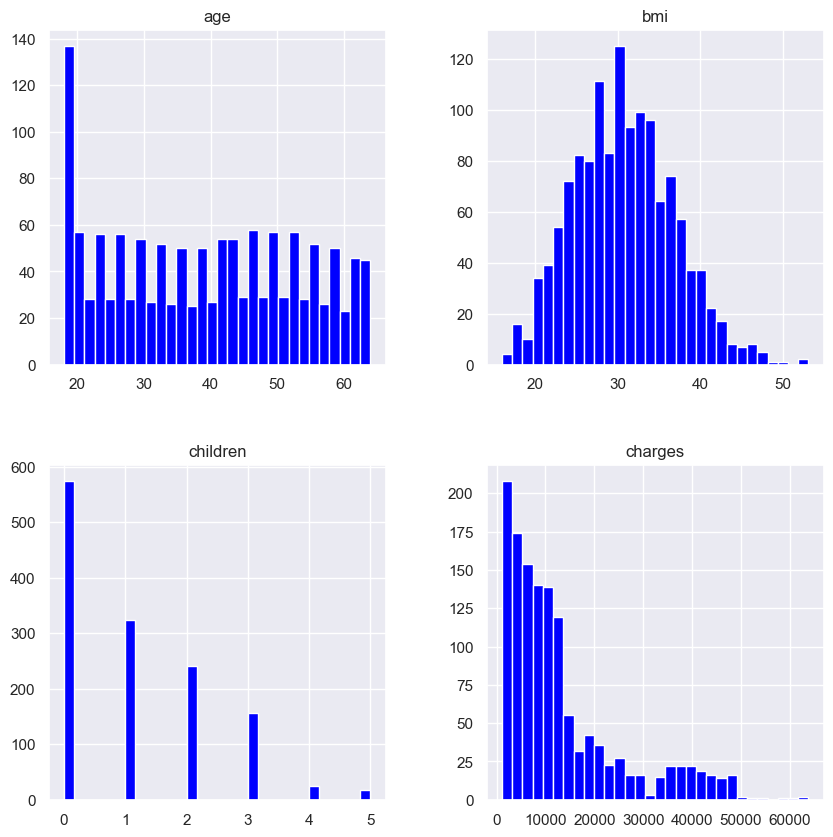

In [88]:
df[['age', 'bmi', 'children', 'charges']].hist(bins=30, figsize=(10, 10), color='blue')
plt.show()


In [90]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [94]:
df['sex'] = df['sex'].apply({'male': 0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes': 1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest': 1, 'southeast': 2, 'northwest':3, 'northeast':4}.get)

In [96]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


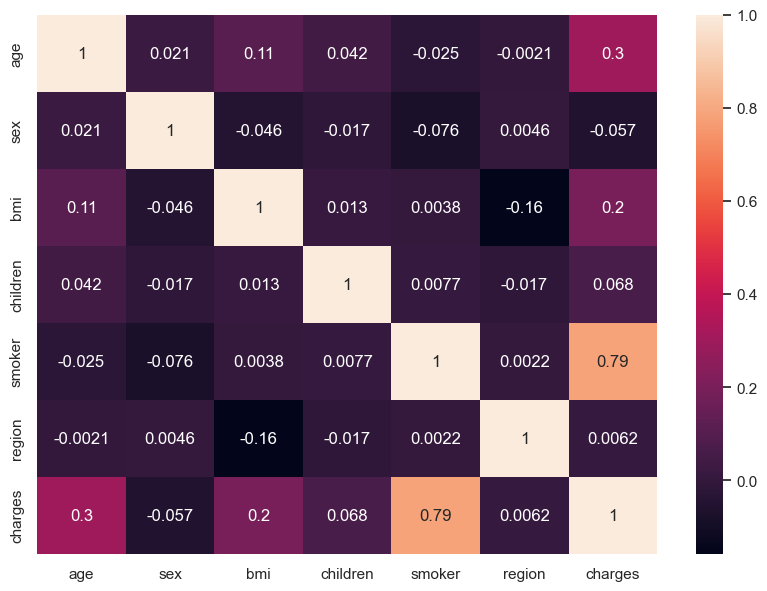

In [98]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [100]:
x = df.drop(['charges', 'sex'], axis=1)
y = df.charges

In [122]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (936, 5)
X_test shape:  (402, 5)
y_train shape:  (936,)
y_test shape:  (402,)


In [124]:
# Assuming x and y are defined
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Creating the Linear Regression model
linreg = LinearRegression()

# Fitting the model
linreg.fit(X_train, y_train)

# Making predictions
pre = linreg.predict(X_test)

In [126]:
from sklearn.metrics import r2_score

In [130]:
print("R2 score: ", r2_score(y_test, pre))

R2 score:  0.7697211527941855


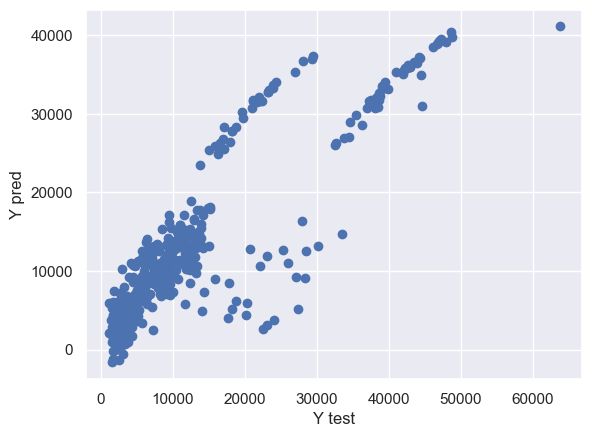

In [134]:
plt.scatter(y_test, pre)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show()

In [136]:
data = {'age':50, 'bmi':25, 'children':2, 'smoker':0, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,bmi,children,smoker,region
0,50,25,2,0,2


In [138]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [9579.86504857]


In [104]:
insurance_dataset['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

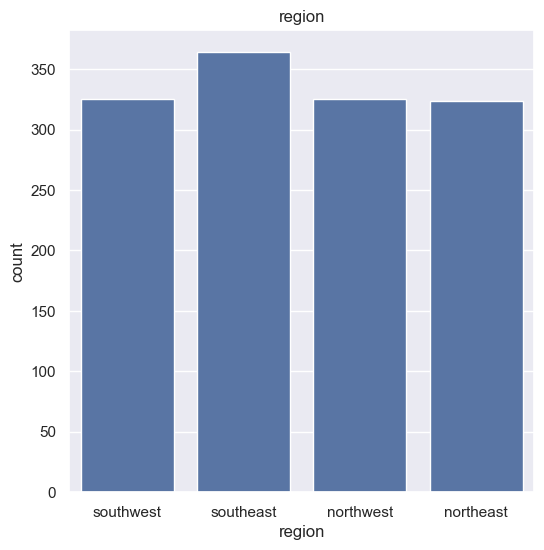

In [140]:
# region column
plt.figure(figsize=(6,6))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [142]:
insurance_dataset['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

C:\Users\ishar\AppData\Local\Temp\ipykernel_9228\3953511406.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


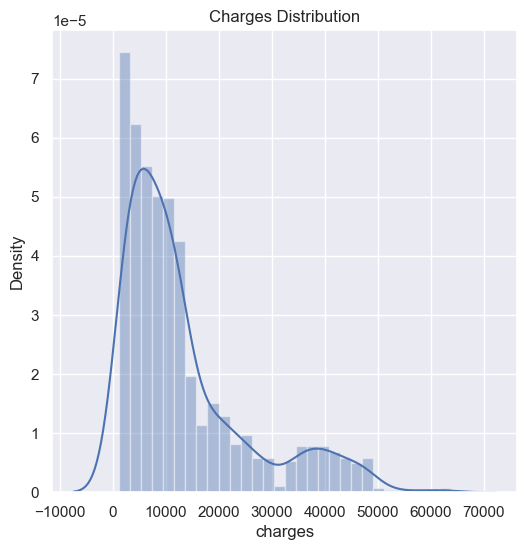

In [144]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(insurance_dataset['charges'])
plt.title('Charges Distribution')
plt.show()


In [166]:
#Splitting the Features and Target

X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [168]:
print(X)

      age     sex     bmi  children smoker     region
0      19  female  27.900         0    yes  southwest
1      18    male  33.770         1     no  southeast
2      28    male  33.000         3     no  southeast
3      33    male  22.705         0     no  northwest
4      32    male  28.880         0     no  northwest
...   ...     ...     ...       ...    ...        ...
1333   50    male  30.970         3     no  northwest
1334   18  female  31.920         0     no  northeast
1335   18  female  36.850         0     no  southeast
1336   21  female  25.800         0     no  southwest
1337   61  female  29.070         0    yes  northwest

[1338 rows x 6 columns]


In [152]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [154]:
#Splitting the data into Training data & Testing Data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [156]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [172]:
#Model Training
#Linear Regression

# loading the Linear Regression model
regressor = LinearRegression()

In [198]:
regx = pd.get_dummies(x, drop_first=True)

In [200]:
#Model Evaluation
# Perform one-hot encoding on your feature set 'x'
x = pd.get_dummies(x, drop_first=True)

# Now, proceed with splitting the data and fitting the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Then, fit your model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Prediction on training data
training_data_prediction = regressor.predict(X_train)

In [202]:
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.7422367098256165


In [204]:
# prediction on test data
test_data_prediction =regressor.predict(X_test)

In [206]:
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7697211527941855


In [223]:
# Example input data for prediction (e.g., 31, male, 25.74 BMI, 0 children, smoker, region 1)
input_data = (31, 1, 25.74, 0, 1, 0)

# Convert input_data into a numpy array and reshape it for prediction
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Assuming you have a trained model (regressor) and you used one-hot encoding during training
# Apply the same one-hot encoding transformation to the input data
# Create a DataFrame using the same column names that were used in training
feature_names = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']  # Update if more features are used

input_data_df = pd.DataFrame(input_data_reshaped, columns=feature_names)

# Apply one-hot encoding to input data (ensure the input is processed like the training data)
input_data_df = pd.get_dummies(input_data_df, drop_first=True)

# Ensure the input data matches the model's input shape (in case of missing columns after encoding)
input_data_df = input_data_df.reindex(columns=X_train.columns, fill_value=0)

# Make the prediction
prediction = regressor.predict(input_data_df)

# Print the result
print('The insurance cost is USD ', prediction[0])

The insurance cost is USD  26985.004886025923
